In [168]:
# part 1
import sklearn
import pandas as pd

In [169]:
data = pd.read_csv("./data/project1.csv")

In [170]:
data.describe()

,mpg,cylinders,displacement,weight,acceleration,model_year,origin
count,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000
mean,23.337949,5.484615,194.724359,2978.676923,15.543846,75.887179,1.576923
std,7.759300,1.705433,104.910938,852.709438,2.723468,3.633264,0.803579
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,101.750000,2220.750000,13.825000,73.000000,1.000000
50%,22.350000,4.000000,151.000000,2831.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,293.250000,3618.250000,17.000000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [171]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           390 non-null    float64
 1   cylinders     390 non-null    int64  
 2   displacement  390 non-null    float64
 3   horsepower    390 non-null    object 
 4   weight        390 non-null    int64  
 5   acceleration  390 non-null    float64
 6   model_year    390 non-null    int64  
 7   origin        390 non-null    int64  
 8   car_name      390 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 27.5+ KB


In [172]:
# check for the null values
data.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
dtype: int64

In [173]:
data.size

3510

In [174]:
data = data.convert_dtypes()

In [175]:
data.shape

(390, 9)

In [176]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [177]:
# There are some non-numeric value that would give an error when use .astype function so following removes these errors
# Convert non-numeric values to NaN in the horsepower column <- chatgpt helps
data['horsepower'] = pd.to_numeric(data['horsepower'], errors='coerce')

# Drop rows with NaN values in the horsepower column <- chatgpt helps
data.dropna(subset=['horsepower'], inplace=True)

# Convert horsepower column to float
data['horsepower'] = data['horsepower'].astype(float)

In [178]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 384 entries, 0 to 389
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           384 non-null    Float64
 1   cylinders     384 non-null    Int64  
 2   displacement  384 non-null    Float64
 3   horsepower    384 non-null    float64
 4   weight        384 non-null    Int64  
 5   acceleration  384 non-null    Float64
 6   model_year    384 non-null    Int64  
 7   origin        384 non-null    Int64  
 8   car_name      384 non-null    string 
dtypes: Float64(3), Int64(4), float64(1), string(1)
memory usage: 32.6 KB


In [179]:
data.isnull().values.any()

False

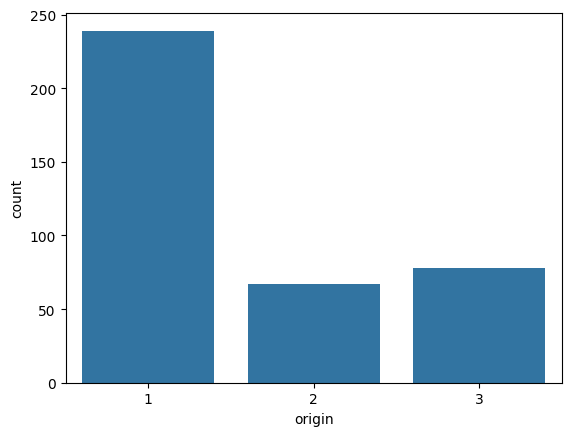

In [180]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(data=data,x='origin')
plt.show()

In [181]:
# hot encoding the origin variables
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)
origin_encoder = encoder.fit_transform(data[['origin']])
origin_encoder_pd = pd.DataFrame(origin_encoder, columns=encoder.get_feature_names_out(['origin']))
data = pd.concat([data.drop('origin',axis=1), origin_encoder_pd], axis=1)

In [182]:
# show new encoded data
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 390 entries, 0 to 374
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           384 non-null    Float64
 1   cylinders     384 non-null    Int64  
 2   displacement  384 non-null    Float64
 3   horsepower    384 non-null    float64
 4   weight        384 non-null    Int64  
 5   acceleration  384 non-null    Float64
 6   model_year    384 non-null    Int64  
 7   car_name      384 non-null    string 
 8   origin_1.0    384 non-null    float64
 9   origin_2.0    384 non-null    float64
 10  origin_3.0    384 non-null    float64
dtypes: Float64(3), Int64(3), float64(4), string(1)
memory usage: 38.8 KB


In [183]:
# check new encoded data
data.isnull().sum()

mpg             6
cylinders       6
displacement    6
horsepower      6
weight          6
acceleration    6
model_year      6
car_name        6
origin_1.0      6
origin_2.0      6
origin_3.0      6
dtype: int64

In [184]:
# drop new null data
data = data.dropna()

In [185]:
# Drop the 'car_name' column before calculating the correlation matrix <- chatgpt helps on dropping the string variable column
# Because the car name does not help fit the model as a string type categorical variable
corrData = data.drop(columns=['car_name'])

correlation_matrix = corrData.corr()
correlation_matrix
# according to this table, Cylinders, Displacement, Horsepower, and Weight are strong negative correlations with fuel efficiency (mpg) as their correlation values are close to 1 or -1 than the other variables.

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_1.0,origin_2.0,origin_3.0
mpg,1.000000,-0.782705,-0.813887,-0.779397,-0.838449,0.422668,0.563888,-0.409709,0.161711,0.341897
cylinders,-0.782705,1.000000,0.951563,0.843112,0.899112,-0.515151,-0.328735,0.412366,-0.234379,-0.276276
displacement,-0.813887,0.951563,1.000000,0.897875,0.933690,-0.551978,-0.363324,0.430121,-0.240132,-0.292281
horsepower,-0.779397,0.843112,0.897875,1.000000,0.863962,-0.697182,-0.409057,0.336197,-0.152009,-0.262259
weight,-0.838449,0.899112,0.933690,0.863962,1.000000,-0.423957,-0.296683,0.416527,-0.202620,-0.311386
acceleration,0.422668,-0.515151,-0.551978,-0.697182,-0.423957,1.000000,0.294794,-0.166578,0.114679,0.092661
model_year,0.563888,-0.328735,-0.363324,-0.409057,-0.296683,0.294794,1.000000,-0.142193,-0.041030,0.210681
origin_1.0,-0.409709,0.412366,0.430121,0.336197,0.416527,-0.166578,-0.142193,1.000000,-0.592934,-0.646718
origin_2.0,0.161711,-0.234379,-0.240132,-0.152009,-0.202620,0.114679,-0.041030,-0.592934,1.000000,-0.230727
origin_3.0,0.341897,-0.276276,-0.292281,-0.262259,-0.311386,0.092661,0.210681,-0.646718,-0.230727,1.000000


In [186]:
corrData.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin_1.0      0
origin_2.0      0
origin_3.0      0
dtype: int64

<Axes: xlabel='Count', ylabel='mpg'>

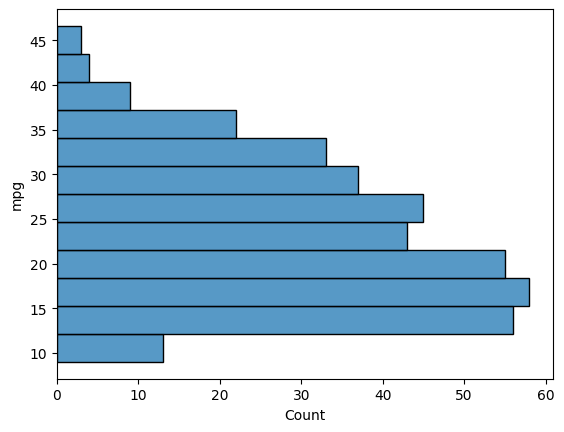

In [187]:
# visualize the univariate variables
import matplotlib.pyplot as plt
import seaborn as sns
# mpg
sns.histplot(y=data['mpg'])

<Axes: ylabel='model_year'>

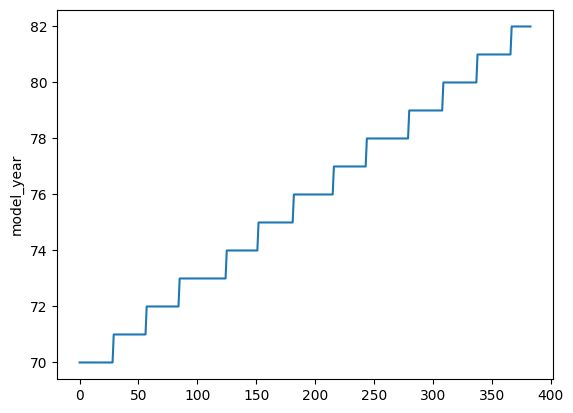

In [188]:
# model year
sns.lineplot(data=data['model_year'])

<Axes: xlabel='count', ylabel='cylinders'>

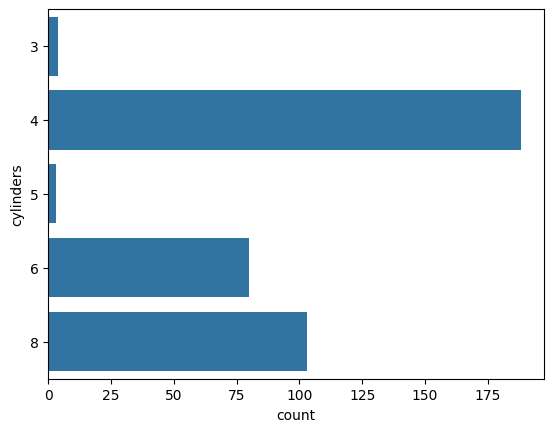

In [189]:
# cylinders
sns.countplot(y=data['cylinders'])

<Axes: xlabel='horsepower', ylabel='acceleration'>

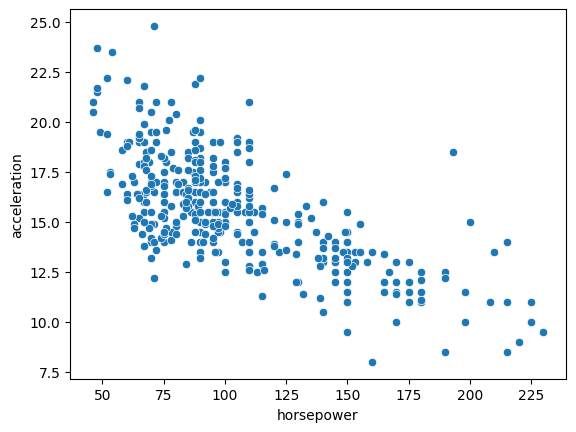

In [190]:
# Compare two variables
# horse power vs acceleration
sns.scatterplot(x='horsepower',y='acceleration',data=data)

<Axes: xlabel='model_year', ylabel='weight'>

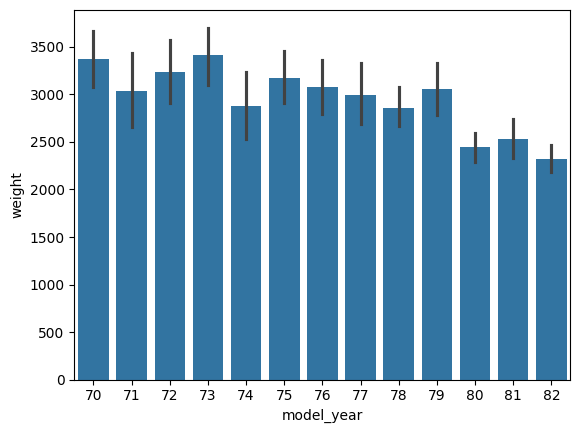

In [191]:
# model year vs weight
sns.barplot(x='model_year',y='weight',data=data)

<Axes: xlabel='cylinders', ylabel='mpg'>

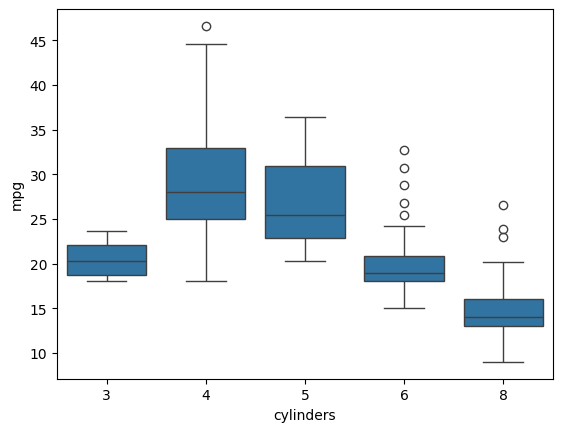

In [192]:
# cylinders vs mpg
sns.boxplot(x='cylinders',y='mpg',data=data)

In [198]:
###

In [197]:
# part 2
from sklearn.model_selection import train_test_split
y = corrData['mpg']
X = corrData.drop('mpg',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [199]:
# linear regrssion modeling
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [210]:
# Find the accuracy score from the linear regression model of test data
from sklearn.metrics import mean_squared_error, r2_score

y_test_pred = model.predict(X_test)
meanSquaredError = mean_squared_error(y_test, y_test_pred)
accuracy_score = r2_score(y_test, y_test_pred)
print('The measurement of how close the regrssion line to the data: %.2f' % meanSquaredError)
print('The score shows accuracy of the fit is: %.2f' % accuracy_score)

The measurement of how close the regrssion line to the data: 14.45
The score shows accuracy of the fit is: 0.80


In [212]:
# Find the accuracy score from the linear regression model of train data
y_train_pred = model.predict(X_train)
meanSquaredError = mean_squared_error(y_train, y_train_pred)
accuracy_score = r2_score(y_train, y_train_pred)
print('The measurement of how close the regrssion line to the data: %.2f' % meanSquaredError) # better than test data
print('The score shows accuracy of the fit is: %.2f' % accuracy_score) # not 100%
print("Cylinders, Displacement, Horsepower, and Weight: These measures are important as they directly relate to the engine's power and size, which can vary significantly based on the vehicle's origin. Different regions might have distinct preferences for engine types and sizes, affecting the origin prediction.\nModel Year: This measure provides information about the vehicle's age and technological advancements incorporated into newer models. Newer models tend to have different engineering standards and may reflect improvements in fuel efficiency, safety, and performance.")

The measurement of how close the regrssion line to the data: 9.58
The score shows accuracy of the fit is: 0.82
Cylinders, Displacement, Horsepower, and Weight: These measures are important as they directly relate to the engine's power and size, which can vary significantly based on the vehicle's origin. Different regions might have distinct preferences for engine types and sizes, affecting the origin prediction.
Model Year: This measure provides information about the vehicle's age and technological advancements incorporated into newer models. Newer models tend to have different engineering standards and may reflect improvements in fuel efficiency, safety, and performance.


Text(0.5, 1.0, 'Test MPG')

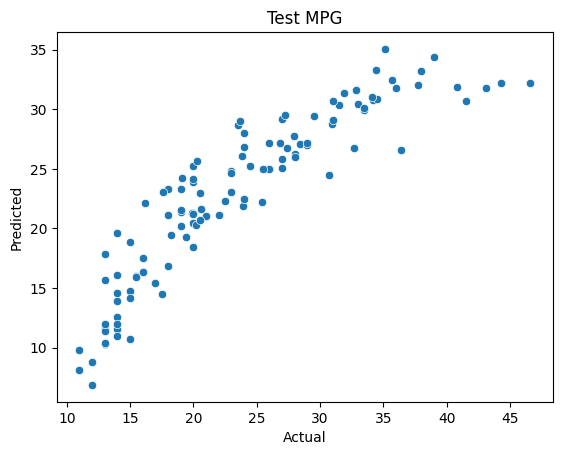

In [216]:
# Visualize the predicted test data vs real data
sns.scatterplot(x=y_test, y=y_test_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Test MPG")

Text(0.5, 1.0, 'Train MPG')

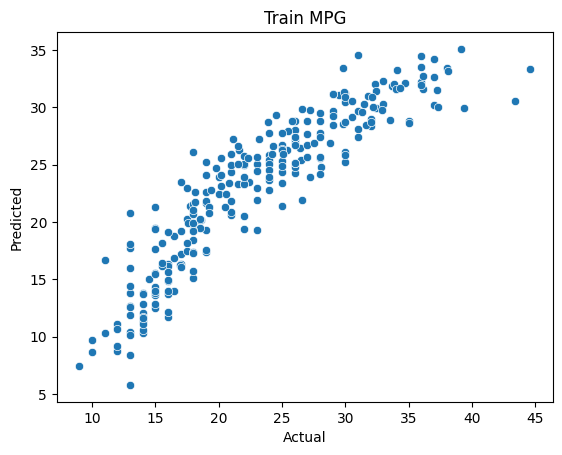

In [215]:
# Visualize the predicted train data vs real data
sns.scatterplot(x=y_train, y=y_train_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Train MPG")